In [1]:
import toml
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from rl_analysis.plotting import add_legend, save_factory, setup_plotting_env, COLORS, fg

In [2]:
with open("../analysis_configuration.toml", "r") as f:
    config = toml.load(f)

saver = save_factory(join(config['figures']['store_dir'], 'fig-02'), tight_layout=False)

setup_plotting_env()

## Add food peaks

In [12]:
food_peaks = joblib.load(join(config['intermediate_results']['dlight'], 'dlight-food-peaks.p.z'))

In [4]:
list(food_peaks)

['approach_da+vel',
 'approach_spont_da',
 'approach_and_eat_da+vel',
 'approach_and_eat_spont_da',
 'eat_da+vel',
 'eat_spont_da']

In [5]:
food_peaks['eat_da+vel'].query('time == 0')['trace'].agg(['mean', 'std', 'count', 'max'])

mean      2.364895
std       0.917223
count    10.000000
max       3.942242
Name: trace, dtype: float64

In [6]:
food_peaks['eat_spont_da'].query('time == 0')['trace'].agg(['mean', 'std', 'count', 'max'])

mean        2.121785
std         0.801698
count    5247.000000
max         9.385931
Name: trace, dtype: float64

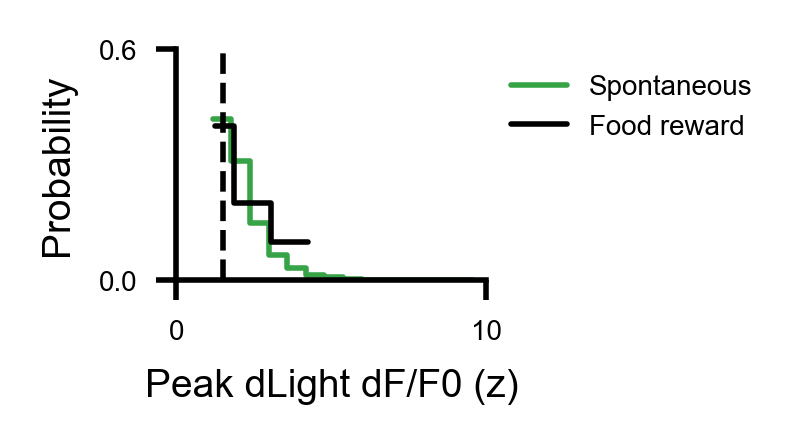

In [7]:
fig = fg(1, 0.75)
ax = sns.histplot(
    food_peaks['eat_spont_da'].query('time == 0')['trace'],
    fill=False,
    stat="probability",
    element="step",
    label="Spontaneous",
    color=COLORS['green'],
    binwidth=0.6,
    linewidth=1
)

sns.histplot(
    food_peaks['eat_da+vel'].query('time == 0')['trace'],
    fill=False,
    stat="probability",
    element="step",
    label="Food reward",
    color='k',
    binwidth=0.6,
    linewidth=1
)
sns.despine()
plt.axvline(1.5, color='k', linestyle='--', linewidth=1)
plt.xlabel("Peak dLight dF/F0 (z)")
add_legend(ax)
plt.xticks([0, 10])
plt.xlim(0, 10)
plt.yticks([0, 0.6])
plt.ylim(0, 0.6)
saver(fig, 'spont-dlight-vs-food-peaks');

## Plot peak-aligned food and spontaneous waveform

(-1.005272449252276, 2.812159986358507)


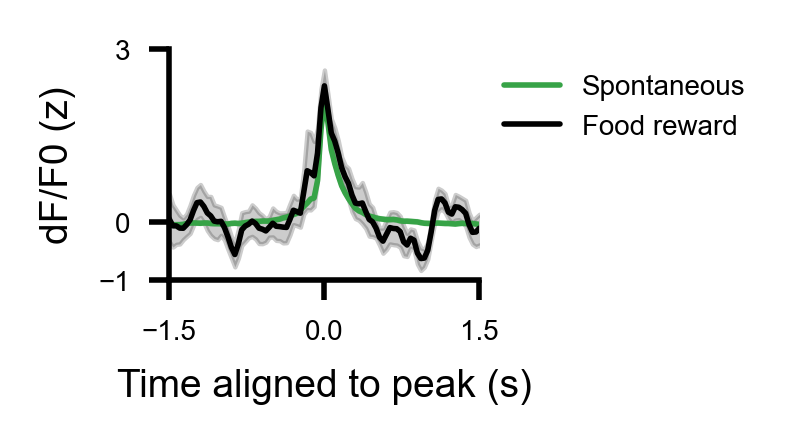

In [8]:
fig = fg(1, 0.75)
ax = sns.lineplot(
    data=food_peaks["eat_spont_da"],
    x="time",
    y="trace",
    errorbar=('ci', 68),
    color=COLORS['green'],
    label="Spontaneous",
)
sns.lineplot(
    data=food_peaks["eat_da+vel"], x="time", y="trace", errorbar=('ci', 68), color='k', label="Food reward"
)
plt.xlim(-1.5, 1.5)
plt.xticks([-1.5, 0, 1.5])
print(plt.ylim())
plt.yticks([-1, 0, 3])
plt.ylim(-1, 3)
add_legend(ax)
plt.ylabel("dF/F0 (z)")
plt.xlabel("Time aligned to peak (s)")
sns.despine()
saver(fig, "spont-dlight-vs-food-waveforms");

## Plot velocity

In [9]:
_df = food_peaks['eat_da+vel']
_df['velocity'] *= 30

(-3.8307654519081127, 165.97655279588702)


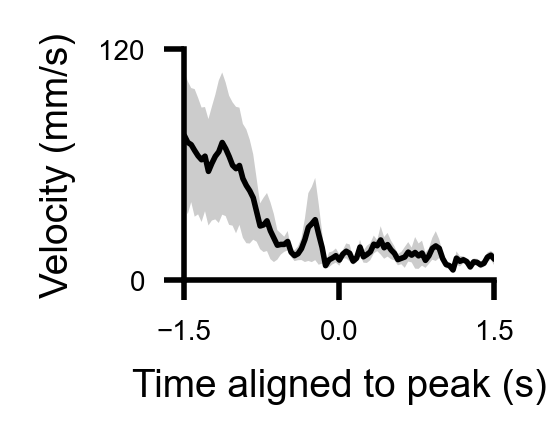

In [10]:
fig = fg(1, 0.75)
ax = sns.lineplot(
    data=_df, x="time", y="velocity", errorbar=("ci", 68), color="k", err_kws=dict(linewidth=0)
)
plt.xlim(-1.5, 1.5)
plt.xticks([-1.5, 0, 1.5])
print(plt.ylim())
plt.yticks([0, 120])
plt.ylim(0, 120)
plt.ylabel("Velocity (mm/s)")
plt.xlabel("Time aligned to peak (s)")
sns.despine()
saver(fig, "velocity-aligned-to-eating");